Import Required Module

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

Load one image 

In [2]:
image = Image.open("frame_0.jpg")

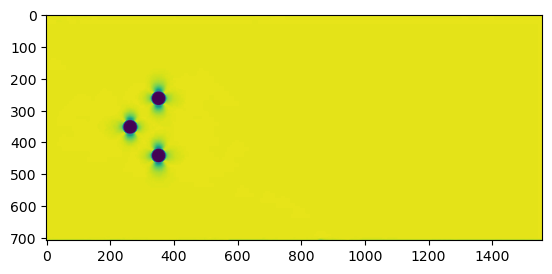

In [3]:
plt.imshow(image)
plt.show()

All About Image Information

In [4]:
color_mode = image.mode
if color_mode == "RGB":
    print("The image is in RGB format.")
else:
    print("The image is not in RGB format.")


The image is not in RGB format.


In [5]:
width, height = image.size

In [6]:
width,height

(1558, 708)

In [7]:
# Convert the image to a numpy array
pixel_array = np.array(image)

# Flatten the pixel array
flattened_array = pixel_array.flatten()

# Print or use the flattened array as needed
print(flattened_array)


[213 213 213 ... 201 201 201]


In [8]:
pixel_array.shape

(708, 1558)

In [9]:
flattened_array.size

1103064

In [11]:
pixel = np.empty((1103064, 751), dtype = 'int')

In [12]:
for i in range(0,751):
    image = Image.open(f"frame_{i}.jpg")
    # Convert the image to a numpy array
    pixel_array = np.array(image)
    
    # Flatten the pixel array
    flattened_array = pixel_array.flatten()
    # Print or use the flattened array as needed
    pixel[:,i] = flattened_array - np.mean(flattened_array)

In [13]:
# for i in range(0,751):
#     pixel[:,i] = pixel[:,i] - np.mean(pixel[:,i])

In [14]:
pixel

array([[ -9, -10, -10, ...,  -4,  -4,  -4],
       [ -9, -10, -10, ...,  -4,  -4,  -4],
       [ -9, -10, -10, ...,  -4,  -4,  -4],
       ...,
       [-21, -19, -19, ..., -31, -31, -31],
       [-21, -19, -19, ..., -31, -31, -31],
       [-21, -19, -19, ..., -31, -31, -31]])

In [15]:
pixel.shape

(1103064, 751)

In [16]:
covariance_matrix = np.cov(pixel, rowvar=False)

In [17]:
covariance_matrix

array([[217.74888462, 217.53973339, 217.36270099, ..., 207.92871218,
        207.53586076, 206.84277535],
       [217.53973339, 218.51641876, 218.63510029, ..., 209.24883153,
        208.88163583, 208.17308245],
       [217.36270099, 218.63510029, 220.97539774, ..., 212.87917148,
        212.30284284, 211.4489789 ],
       ...,
       [207.92871218, 209.24883153, 212.87917148, ..., 285.06583638,
        273.73488273, 252.81955821],
       [207.53586076, 208.88163583, 212.30284284, ..., 273.73488273,
        284.82760688, 271.64309554],
       [206.84277535, 208.17308245, 211.4489789 , ..., 252.81955821,
        271.64309554, 282.9988853 ]])

In [18]:
# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[1.80672813e+05 3.90753163e+03 3.38535246e+03 2.16717424e+03
 1.91310658e+03 1.80453418e+03 1.65968551e+03 1.54011499e+03
 1.45968274e+03 1.37089181e+03 1.18951182e+03 1.02051988e+03
 9.93166535e+02 9.77362004e+02 9.13841473e+02 8.77164318e+02
 8.20101399e+02 7.27557868e+02 6.81664630e+02 6.31942914e+02
 5.89227330e+02 5.59358963e+02 4.77585149e+02 4.61309909e+02
 4.28842924e+02 4.23259572e+02 3.82438735e+02 3.70027298e+02
 3.49587536e+02 3.23588513e+02 2.84337356e+02 2.67997650e+02
 2.63626404e+02 2.23337143e+02 2.00690895e+02 1.90967734e+02
 1.82120222e+02 1.74823784e+02 1.71872526e+02 1.64724374e+02
 1.58190799e+02 1.50606091e+02 1.42598806e+02 1.40573103e+02
 1.35767952e+02 1.33596579e+02 1.26405140e+02 1.24895552e+02
 1.22807372e+02 1.18398769e+02 1.14707899e+02 1.09910810e+02
 1.09259881e+02 1.02563810e+02 1.01651641e+02 9.87227228e+01
 9.77535789e+01 9.06615491e+01 8.83494572e+01 8.63866872e+01
 8.56365100e+01 8.23573628e+01 7.94390081e+01 8.05052704e+01
 7.43028802

In [19]:
#projection of the data in the eigenvectors 
a = np.empty((1103064, 751), dtype = 'int') 

In [20]:
a = np.dot(pixel,eigenvectors)

In [21]:
a

array([[ 9.79621148e+01,  1.71948639e+00, -1.27377151e+00, ...,
         1.51261192e-02,  3.85498994e-02,  1.55637038e-01],
       [ 9.79621148e+01,  1.71948639e+00, -1.27377151e+00, ...,
         1.51261192e-02,  3.85498994e-02,  1.55637038e-01],
       [ 9.79621148e+01,  1.71948639e+00, -1.27377151e+00, ...,
         1.51261192e-02,  3.85498994e-02,  1.55637038e-01],
       ...,
       [ 8.17453964e+02, -5.97693169e+00,  5.31851803e-01, ...,
         7.19584277e-02, -3.04062141e-01,  8.29700637e-01],
       [ 8.18950134e+02, -6.23841124e+00,  3.14348868e-01, ...,
        -4.17373287e-02, -1.10079522e-01,  8.62199365e-01],
       [ 8.18477538e+02, -6.29315055e+00,  4.03260099e-01, ...,
        -1.38733385e-02, -1.40025340e-01,  8.63488775e-01]])

In [22]:
et = eigenvectors.T

In [23]:
mean = np.zeros(1558*708)

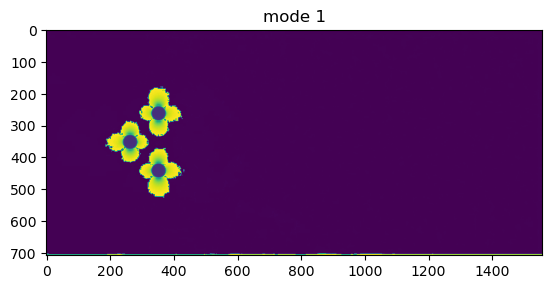

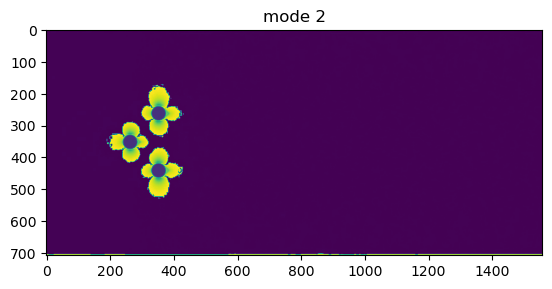

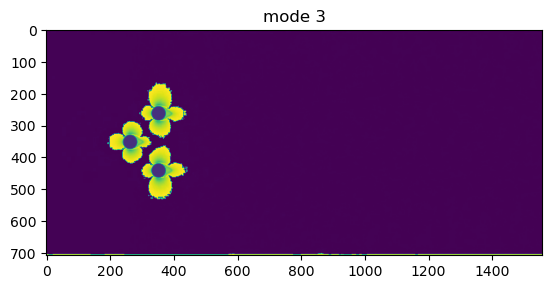

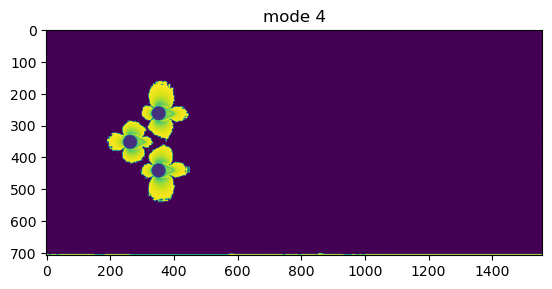

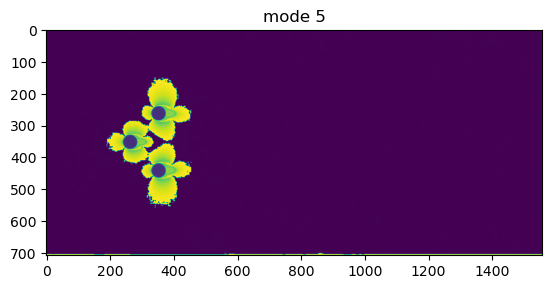

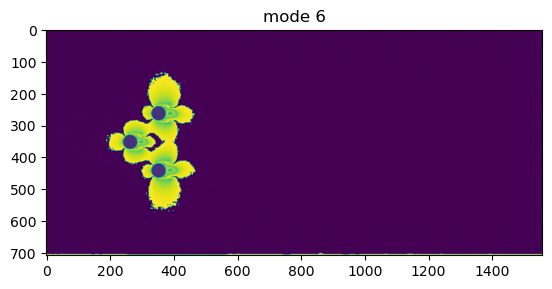

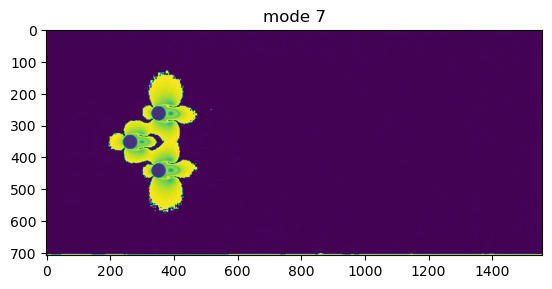

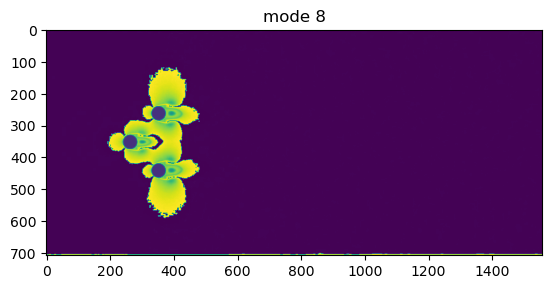

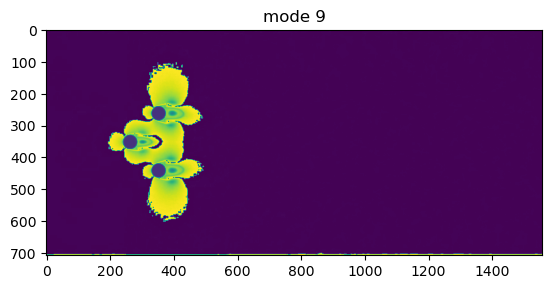

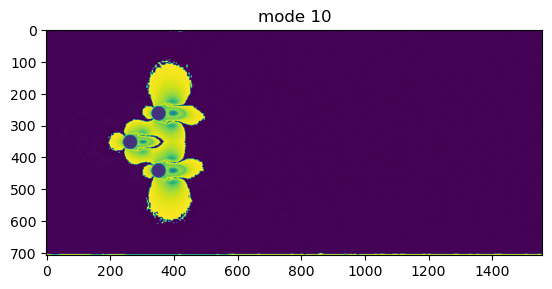

In [24]:
for i in range(0,10):
    result = np.dot(a, et[:,i])
    mean = mean+result
    width = 1558  # Width of the image
    height = 708  # Height of the image
    
    # Reshape the flattened array into the shape (height, width, channels)
    # Channels could be 1 for grayscale or 3 for RGB
    # For grayscale, it's (height, width), for RGB it's (height, width, 3)
    image_array = np.reshape(result, (height, width))  # Assuming RGB
    
    # Convert the array to an image
    image2 = Image.fromarray(image_array.astype('uint8'))  # Convert to uint8 (0-255)
    plt.title(f"mode {i+1}")
    plt.imshow(image2)
    plt.show()

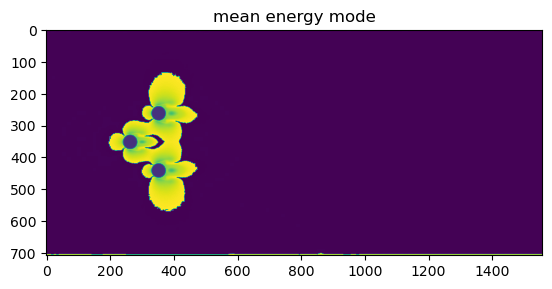

In [25]:
mean = mean/10
width = 1558  # Width of the image
height = 708  # Height of the image
image_array = np.reshape(mean, (height, width))  # Assuming RGB
    
# Convert the array to an image
image2 = Image.fromarray(image_array.astype('uint8'))  # Convert to uint8 (0-255)
plt.title("mean energy mode")
plt.imshow(image2)
plt.show()

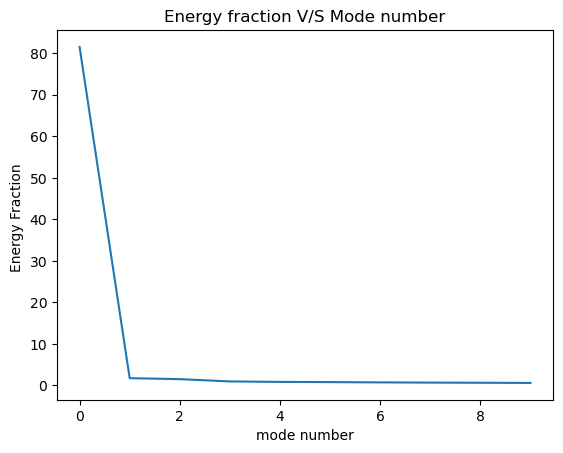

In [27]:
import numpy as np
import matplotlib.pyplot as plt

sum1 = 0
for i in range(0, 751):
    sum1 += eigenvalues[i]

energy = np.zeros(10) 
for i in range(0, 10):
    energy[i] = eigenvalues[i]*100 / sum1

modes = np.zeros(10) 
for i in range(1, 10):
    modes[i] = i

plt.plot(modes, energy)
# plt.plot(modes,eigenvalues[1:10]
plt.title("Energy fraction V/S Mode number")
plt.xlabel("mode number")
plt.ylabel("Energy Fraction ")
plt.show()

